
# Bit‑plane Visualizer

This notebook lets you upload or specify an image and then visualises every single **bit‑plane** of its RGB channels.  
Because each colour channel (Red, Green, Blue) has 8 bits, you’ll get **24 grayscale images** in total.


In [8]:

from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Make plots a little bigger
plt.rcParams['figure.figsize'] = (18, 9)


In [9]:

def load_image(path_or_pil):
    """Return a PIL.Image in RGB mode."""
    if isinstance(path_or_pil, Image.Image):
        img = path_or_pil.convert('RGB')
    else:
        img = Image.open(Path(path_or_pil)).convert('RGB')
    return img


In [10]:
from typing import List, Union

# ---------- bit-list helpers ----------
def int_to_bits(n: int, width: int) -> List[int]:
    """Return a list of `width` bits (MSB first) representing integer `n`."""
    return [(n >> i) & 1 for i in reversed(range(width))]

def bits_to_int(bits: List[int]) -> int:
    """Return the integer value of a list of bits (MSB first)."""
    val = 0
    for bit in bits:
        val = (val << 1) | (bit & 1)
    return val

# ---------- conversions on bit-lists ----------
def binary_to_gray(bits: List[int]) -> List[int]:
    """
    Convert a Pure Binary Code bit-list to Canonical Gray Code.
    Implements:
        g₁ = b₁
        gᵢ = bᵢ₋₁ ⊕ bᵢ     for i ≥ 2
    """
    gray = [bits[0]]
    for i in range(1, len(bits)):
        gray.append(bits[i - 1] ^ bits[i])
    return gray

def gray_to_binary(gray: List[int]) -> List[int]:
    """
    Convert a Canonical Gray Code bit-list back to Pure Binary Code.
    Implements:
        b₁ = g₁
        bᵢ = gᵢ ⊕ bᵢ₋₁     for i ≥ 2
    """
    binary = [gray[0]]
    for i in range(1, len(gray)):
        binary.append(gray[i] ^ binary[i - 1])
    return binary

# ---------- convenience integer wrappers ----------
def binary_int_to_gray_int(n: int, width: int) -> int:
    """Integer binary → integer Gray (same bit-width)."""
    return bits_to_int(binary_to_gray(int_to_bits(n, width)))

def gray_int_to_binary_int(g: int, width: int) -> int:
    """Integer Gray → integer binary (same bit-width)."""
    return bits_to_int(gray_to_binary(int_to_bits(g, width)))

# # ---------- demo ----------
# if __name__ == "__main__":
#     width = 4
#     for n in range(2 ** width):
#         gray = binary_int_to_gray_int(n, width)
#         back = gray_int_to_binary_int(gray, width)
#         print(f"{n:0{width}b} (bin)  →  {gray:0{width}b} (gray)  →  {back:0{width}b} (bin)")


In [15]:

def show_bit_planes(img):
    """Show 8 bit‑planes for each RGB channel of *img*."""
    if not isinstance(img, Image.Image):
        img = load_image(img)
    arr = np.array(img)  # shape (h, w, 3), uint8
    
    fig, axes = plt.subplots(3, 8, figsize=(20, 9))
    channels = ['Rot', 'Grün', 'Blau']
    
    for ch in range(3):
        channel_data = arr[..., ch]
        for bit in range(8):
            mask = 1 << bit
            plane = ((channel_data & mask) >> bit) * 255  # 0 or 255
            ax = axes[ch, bit]
            ax.imshow(plane, cmap='gray', vmin=0, vmax=255)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f"{channels[ch]} bit {bit}")
    
    plt.tight_layout()
    plt.show()


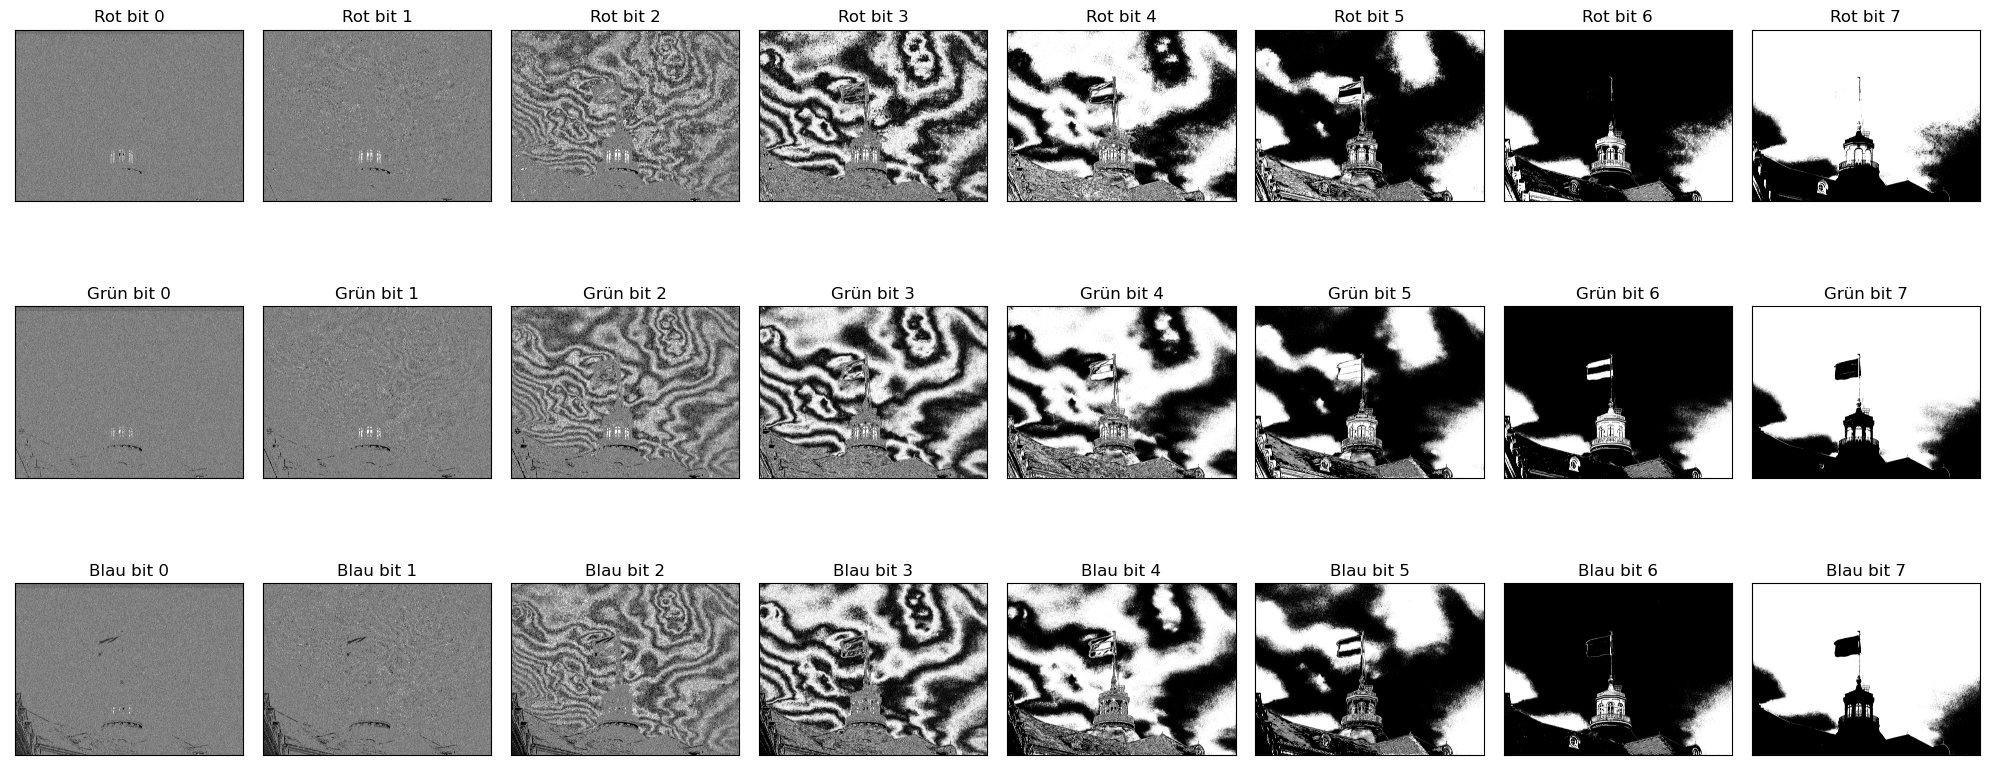

In [22]:
image_path = "examples/output/baden_lsb.png"   # ← change me!
show_bit_planes(image_path)